In [1]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [2]:
from importlib import reload

In [3]:
from medvqa.datasets.medical_tags_extractor import MedicalTagsExtractor

In [4]:
med_tags_extractor = MedicalTagsExtractor('medical_terms_frequency__20220317_145545.pkl')

In [5]:
len(med_tags_extractor.tags)

1956

In [40]:
!python ../train_vqa.py \
        --epochs 40 \
        --batches-per-epoch 500 \
        --batch-size 37 \
        --lr-decay-patience 2 \
        --vocab-min-freq 5 \
        --iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220324_143133.json" \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220324_151809.json" \
        --densenet-pretrained-weights-path "/home/pdpino/workspace-medical-ai/public_checkpoints/cls-0321_052008_chexpert_densenet-121-v2_drop0.3_labels13_normS_wd1e-05_size256_lr0.0001_sch-roc_auc-p3-f0.5_shuffle.pt" \
        --use-tags \
        --n-medical-tags 1956 \
        --iuxray-medical-tags-per-report-filename "medical_tags_per_report__from(qa_adapted_reports__20220324_143133.json)__20220324_165148.pkl" \
        --mimiccxr-medical-tags-per-report-filename "medical_tags_per_report__from(qa_adapted_reports__20220324_151809.json)__20220324_165325.pkl" \
        --use-orientation \
        --use-chexpert \
        --iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220405_160451.pkl" \
        --mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220405_160542.pkl" \
        --balanced-split \
        --iuxray-balanced-metadata-filename "balanced_dataloading_metadata__20220407_150040.pkl" \
        --mimiccxr-balanced-metadata-filename "balanced_dataloading_metadata__20220407_150400.pkl" \
        --save

script's arguments:
   epochs: 40
   batches_per_epoch: 500
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220324_143133.json
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220324_151809.json
   vocab_min_freq: 5
   embed_size: 128
   hidden_size: 128
   question_vec_size: 128
   image_local_feat_size: 1024
   dropout_prob: 0
   densenet_pretrained_weights_path: /home/pdpino/workspace-medical-ai/public_checkpoints/cls-0321_052008_chexpert_densenet-121-v2_drop0.3_labels13_normS_wd1e-05_size256_lr0.0001_sch-roc_auc-p3-f0.5_shuffle.pt
   lr: 0.001
   lr_decay: 0.76
   lr_decay_patience: 2
   n_val_examples_per_question: 10
   min_train_examples_per_question: 100
   batch_size: 37
   mimic_iuxray_freqs: [200, 10]
   device: GPU
   balanced_split: True
   n_healthy_per_question: 2
   n_unhealthy_per_question: 3
   min_question_count: 100
   iuxray_balanced_metadata_filename: balanced_dataloading_metadata__20220407_150040.pkl
   mimiccxr_balanced_metadata_filena

loss 7.72167, bq 0.99572, cD 0.64587, wmdcmp 0.12309, mtf1 0.30452, oracc 0.96722, chxlacc 0.82653, 26.58 secs
---- Epoch 13/40
(1) Training stage ...
loss 4.61397, bq 0.99366, cD 0.94413, wmdcmp 0.14780, mtf1 0.30123, oracc 0.97871, chxlacc 0.80815, 194.95 secs
(2) Validation stage ...
loss 20.83806, bq 0.99828, cD 0.65640, wmdcmp 0.12920, mtf1 0.26564, oracc 0.92436, chxlacc 0.81071, 26.58 secs
Epoch    13: reducing learning rate of group 0 to 5.7760e-04.
---- Epoch 14/40
(1) Training stage ...
loss 3.26341, bq 0.99567, cD 0.96582, wmdcmp 0.15067, mtf1 0.30726, oracc 0.98897, chxlacc 0.81345, 195.25 secs
(2) Validation stage ...
loss 7.43668, bq 0.99817, cD 0.62653, wmdcmp 0.13069, mtf1 0.30583, oracc 0.98856, chxlacc 0.84007, 26.71 secs
---- Epoch 15/40
(1) Training stage ...
loss 3.12358, bq 1.00000, cD 0.98932, wmdcmp 0.15312, mtf1 0.30930, oracc 0.99219, chxlacc 0.81675, 195.39 secs
(2) Validation stage ...
loss 7.46594, bq 0.99832, cD 0.76927, wmdcmp 0.14409, mtf1 0.30379, oracc

loss 2.72360, bq 1.00000, cD 1.25477, wmdcmp 0.18968, mtf1 0.32440, oracc 0.99503, chxlacc 0.82795, 199.05 secs
(2) Validation stage ...
loss 7.96793, bq 1.00000, cD 0.80279, wmdcmp 0.15383, mtf1 0.31948, oracc 0.99282, chxlacc 0.84695, 26.59 secs


In [44]:
!python ../train_vqa.py \
        --checkpoint-folder "models/vqa/20220413_024015_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_vocab-minf=5_emb-size=128_hidden-size=128_q-vec-size=128_img-loc-feat-size=1024_drop-prob=0_cnn-pretrained=True_mimic-iuxray-freqs=200,10_use_tags=True_use_orien=True_use_chx=True" \
        --epochs 20 \
        --batches-per-epoch 500 \
        --batch-size 37 \
        --save

script's arguments:
   epochs: 20
   batches_per_epoch: 500
   checkpoint_folder: models/vqa/20220413_024015_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_vocab-minf=5_emb-size=128_hidden-size=128_q-vec-size=128_img-loc-feat-size=1024_drop-prob=0_cnn-pretrained=True_mimic-iuxray-freqs=200,10_use_tags=True_use_orien=True_use_chx=True
   vocab_min_freq: 5
   embed_size: 128
   hidden_size: 128
   question_vec_size: 128
   image_local_feat_size: 1024
   dropout_prob: 0
   densenet_pretrained_weights_path: 
   lr: 0.001
   lr_decay: 0.76
   lr_decay_patience: 2
   n_val_examples_per_question: 10
   min_train_examples_per_question: 100
   batch_size: 37
   mimic_iuxray_freqs: [200, 10]
   device: GPU
   balanced_split: False
   n_healthy_per_question: 2
   n_unhealthy_per_question: 3
   min_question_count: 100
   save: True
   override_lr: False
   train_mimiccxr: True
   train_iuxray: True
   use_tags: False
   use_orientation: False
   use_chexpert: False
----- Resuming training ------
m

loss 8.05175, bq 1.00000, cD 0.80627, wmdcmp 0.15797, mtf1 0.32820, oracc 0.97595, chxlacc 0.83617, 26.50 secs
---- Epoch 118/124
(1) Training stage ...
loss 2.78249, bq 1.00000, cD 1.42785, wmdcmp 0.21092, mtf1 0.34350, oracc 0.99918, chxlacc 0.84353, 194.46 secs
(2) Validation stage ...
loss 8.05025, bq 1.00000, cD 0.80044, wmdcmp 0.15926, mtf1 0.33027, oracc 0.97440, chxlacc 0.84088, 26.52 secs
---- Epoch 119/124
(1) Training stage ...
loss 2.68964, bq 1.00000, cD 1.45213, wmdcmp 0.21372, mtf1 0.34323, oracc 0.99907, chxlacc 0.84441, 194.02 secs
(2) Validation stage ...
loss 8.02877, bq 1.00000, cD 0.80364, wmdcmp 0.15887, mtf1 0.33147, oracc 0.97440, chxlacc 0.83982, 26.37 secs
---- Epoch 120/124
(1) Training stage ...
loss 2.31659, bq 1.00000, cD 1.44154, wmdcmp 0.21314, mtf1 0.34340, oracc 0.99858, chxlacc 0.84296, 197.01 secs
(2) Validation stage ...
loss 7.83180, bq 1.00000, cD 0.81719, wmdcmp 0.16021, mtf1 0.33246, oracc 0.97440, chxlacc 0.84210, 26.51 secs
Epoch    82: reduci

In [47]:
!python ../eval_vqa.py \
        --checkpoint-folder "models/vqa/20220413_024015_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_vocab-minf=5_emb-size=128_hidden-size=128_q-vec-size=128_img-loc-feat-size=1024_drop-prob=0_cnn-pretrained=True_mimic-iuxray-freqs=200,10_use_tags=True_use_orien=True_use_chx=True"                             

script's arguments:
   checkpoint_folder: models/vqa/20220413_024015_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_vocab-minf=5_emb-size=128_hidden-size=128_q-vec-size=128_img-loc-feat-size=1024_drop-prob=0_cnn-pretrained=True_mimic-iuxray-freqs=200,10_use_tags=True_use_orien=True_use_chx=True
   batch_size: 140
   device: GPU
   eval_iuxray: True
   eval_mimiccxr: True
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220413_024015_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_vocab-minf=5_emb-size=128_hidden-size=128_q-vec-size=128_img-loc-feat-size=1024_drop-prob=0_cnn-pretrained=True_mimic-iuxray-freqs=200,10_use_tags=True_use_orien=True_use_chx=True/metadata.json
1) device = cuda
2) Loading iuxray and mimiccxr QA adapted reports ...
3) Initializing tokenizer ...
Loading /home/pamessina/medvqa-workspace/cache/vocab__min_freq=5__from(qa_adapted_reports__20220324_143133.json;qa_adapted_reports__20220324_151809.json).pkl ...
4) Creating

In [48]:
import medvqa
from medvqa.eval_vqa import evaluate_model

In [7]:
reload(medvqa.utils)
reload(medvqa.utils.constants)
reload(medvqa.utils.files)
reload(medvqa.utils.handlers)
reload(medvqa.metrics.nlp.bleu)
reload(medvqa.metrics)
reload(medvqa.metrics.medical.med_completeness)
reload(medvqa.metrics.medical.chexpert)
reload(medvqa.metrics.medical)
reload(medvqa.metrics.classification.orientation_accuracy)
reload(medvqa.datasets.tokenizer)
reload(medvqa.training.vqa)
reload(medvqa.evaluation.vqa)
reload(medvqa.eval_vqa)
reload(medvqa)

<module 'medvqa' from '/home/pamessina/medvqa/medvqa/__init__.py'>

In [49]:
results = evaluate_model(
    checkpoint_folder = "models/vqa/20220413_024015_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_vocab-minf=5_emb-size=128_hidden-size=128_q-vec-size=128_img-loc-feat-size=1024_drop-prob=0_cnn-pretrained=True_mimic-iuxray-freqs=200,10_use_tags=True_use_orien=True_use_chx=True",
    batch_size=160,
    return_results=True,
    eval_iuxray=True,
    eval_mimiccxr=True,
)

----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220413_024015_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_vocab-minf=5_emb-size=128_hidden-size=128_q-vec-size=128_img-loc-feat-size=1024_drop-prob=0_cnn-pretrained=True_mimic-iuxray-freqs=200,10_use_tags=True_use_orien=True_use_chx=True/metadata.json
1) device = cuda
2) Loading iuxray and mimiccxr QA adapted reports ...
3) Initializing tokenizer ...
Loading /home/pamessina/medvqa-workspace/cache/vocab__min_freq=5__from(qa_adapted_reports__20220324_143133.json;qa_adapted_reports__20220324_151809.json).pkl ...
4) Creating instance of OpenEndedVQA model ...
Using densenet121 with pretrained weights from /home/pdpino/workspace-medical-ai/public_checkpoints/cls-0321_052008_chexpert_densenet-121-v2_drop0.3_labels13_normS_wd1e-05_size256_lr0.0001_sch-roc_auc-p3-f0.5_shuffle.pt
5) Creating evaluator engine ...
6) Defining image transform ...
Returning default transform
7) Creating MIMIC-CXR vqa

100%|██████████| 90/90 [00:00<00:00, 1099.73it/s]

Checking if data is already cached in path /home/pamessina/medvqa-workspace/cache/mimiccxr/mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220324_151809.json;tokenizer=5251,42509,2730556597987494786).pkl ...
	Yes, it is, data successfully loaded :)
generating test dataset ...
generating test dataloader ...
done!
8) Creating IU X-Ray vqa trainer ...
Checking if data is already cached in path /home/pamessina/medvqa-workspace/cache/iuxray/iuxray_preprocessed_train_data__(dataset=qa_adapted_reports__20220324_143133.json;split_params=(100, 2, 3);tokenizer=5251,42509,2730556597987494786;balanced_metadata=balanced_dataloading_metadata__20220407_150040.pkl).pkl ...
	Yes, it is, data successfully loaded :)
Computing balanced datasets from scratch ...
 *** merging from i=0 to j=30, acc_size = 164
 *** merging from i=31 to j=38, acc_size = 186
 *** merging from i=39 to j=42, acc_size = 168
 *** merging from i=43 to j=45, acc_size = 161
 *** merging from i=46 to j=48, acc_size = 19

	len(self.train_datasets) = 41
generating training and validation dataloaders ...
done!
9) Attaching metrics, losses, timer and events to engines ...
checkpoint_names = ['checkpoint_104_bq+cD+wmdcmp+mtf1+oracc+chxlacc=0.6814.pt', 'checkpoint_38_bq+cD+wmdcmp+mtf1+oracc+chxlacc=0.6730.pt', 'checkpoint_109_bq+cD+wmdcmp+mtf1+oracc+chxlacc=0.6805.pt']
10) Loading model from checkpoint ...
checkpoint_path =  /home/pamessina/medvqa-workspace/models/vqa/20220413_024015_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_vocab-minf=5_emb-size=128_hidden-size=128_q-vec-size=128_img-loc-feat-size=1024_drop-prob=0_cnn-pretrained=True_mimic-iuxray-freqs=200,10_use_tags=True_use_orien=True_use_chx=True/checkpoint_104_bq+cD+wmdcmp+mtf1+oracc+chxlacc=0.6814.pt
Loading model and epoch only
Checkpoint successfully loaded!

11) Running evaluator engine on IU X-Ray validation split ...
len(dataset) = 541
len(dataloader) = 4
---- Epoch 105/105
Evaluating model ...
loss 262.09116, bq 1.00000, b1 0.24657, b2 0.11

In [50]:
from medvqa.evaluation.vqa import (
    get_overall_metrics_dataframe,
    get_per_question_metrics_dataframe,
)

In [51]:
get_overall_metrics_dataframe(results['iuxray_agg_metrics'], metrics_to_ignore=['bleu-2', 'bleu-3', 'bleu-4'])

,bq,b1,rg-L,cD,mdcmp,wmdcmp,mtf1,oracc,chxlacc,chx_acc,chx_p_0,chx_p_1,chx_r_0,chx_r_1,chx_f1_0,chx_f1_1,chx_s_0,chx_s_1
0,1.0,0.246568,0.274874,0.853398,0.190425,0.183822,0.354659,0.979667,0.889886,0.943491,0.953637,0.198087,0.937812,0.119424,0.938953,0.126541,7042,532


In [52]:
get_overall_metrics_dataframe(results['mimiccxr_agg_metrics'], metrics_to_ignore=['bleu-2', 'bleu-3', 'bleu-4'])

,bq,b1,rg-L,cD,mdcmp,wmdcmp,mtf1,oracc,chxlacc,chx_acc,chx_p_0,chx_p_1,chx_r_0,chx_r_1,chx_f1_0,chx_f1_1,chx_s_0,chx_s_1
0,1.0,0.207145,0.24621,0.660693,0.148008,0.14218,0.339045,0.996323,0.80191,0.897331,0.930577,0.421697,0.93702,0.249949,0.927888,0.286105,378663,45397


In [79]:
get_per_question_metrics_dataframe(results['iuxray_agg_metrics'],
                                   metrics_to_ignore=['bleu-2', 'bleu-3', 'bleu-4'],
                                   metrics_to_rank=['wmedcomp'])

,Q,bq,b1,rg-L,cD,mdcmp,wmdcmp,mtf1,oracc,chxlacc,count,chx_acc,chx_p_0,chx_p_1,chx_r_0,chx_r_1,chx_f1_0,chx_f1_1,chx_s_0,chx_s_1
0,pneumothorax,1.0,0.468141,0.465719,1.732315,0.386705,0.430864,0.382107,0.981132,0.885445,53,0.981132,0.919137,0.067227,0.925876,0.068571,0.922357,0.067893,685,57
1,tortuosity,1.0,0.358013,0.427438,2.005525,0.380159,0.371737,0.359226,1.000000,0.928571,8,0.973214,0.928571,0.071429,0.928571,0.044643,0.928571,0.054945,104,8
2,pleural space,1.0,0.413294,0.412879,1.462778,0.354228,0.344309,0.371196,0.982456,0.875940,57,0.971178,0.913534,0.062338,0.926065,0.068571,0.919608,0.065306,736,62
3,consolidation,1.0,0.444262,0.450529,1.471601,0.346361,0.310228,0.346870,1.000000,0.875000,24,1.000000,0.928571,0.071429,0.928571,0.071429,0.928571,0.071429,312,24
4,thoracic aorta,1.0,0.335904,0.338945,1.805253,0.293736,0.282051,0.372686,1.000000,0.923469,14,0.954082,0.946939,0.039683,0.952381,0.044643,0.949254,0.042017,186,10
5,edema,1.0,0.304992,0.352691,1.039205,0.260317,0.234783,0.286455,1.000000,0.696429,8,1.000000,0.928571,0.071429,0.928571,0.071429,0.928571,0.071429,104,8
6,cardiomegaly,1.0,0.312945,0.297138,1.229673,0.199546,0.215855,0.372348,1.000000,0.908163,7,0.959184,0.908163,0.071429,0.918367,0.061224,0.911172,0.065934,89,9
7,cardiac silhouette,1.0,0.284608,0.375284,1.363180,0.235040,0.212827,0.369295,0.950000,0.896429,20,0.953571,0.910150,0.055556,0.920798,0.062500,0.915044,0.058824,259,21
8,prominence,1.0,0.254292,0.276750,0.854081,0.190192,0.196881,0.374000,1.000000,0.928571,4,0.892857,0.928571,0.000000,0.934524,0.000000,0.923129,0.000000,53,3
9,mediastinum,1.0,0.242305,0.316883,1.174180,0.203635,0.183914,0.359273,0.970588,0.873950,34,0.953782,0.949930,0.091014,0.939486,0.076508,0.935572,0.074212,438,38


In [72]:
results['mimiccxr_agg_metrics']['overall'].keys()

dict_keys(['bleu_question', 'bleu-1', 'bleu-2', 'bleu-3', 'bleu-4', 'rougeL', 'ciderD', 'chexpert_accuracy', 'chexpert_prf1s', 'medcomp', 'wmedcomp', 'medtagf1', 'orienacc', 'chxlabelacc'])

In [73]:
get_per_question_metrics_dataframe(results['mimiccxr_agg_metrics'],
                                   metrics_to_ignore=['bleu-2', 'bleu-3', 'bleu-4'],
                                   metrics_to_rank=['wmedcomp'])[:40]

,Q,bq,b1,rg-L,cD,mdcmp,wmdcmp,mtf1,oracc,chxlacc,count,chx_acc,chx_p_0,chx_p_1,chx_r_0,chx_r_1,chx_f1_0,chx_f1_1,chx_s_0,chx_s_1
0,free air,1.0,0.544291,0.563866,3.735902,0.561905,0.548622,0.313523,0.986842,0.839286,76,0.992481,0.997180,0.139048,0.941917,0.142857,0.950489,0.140900,989,75
1,pneumoperitoneum,1.0,0.446917,0.472557,2.695200,0.490741,0.524987,0.320396,1.000000,0.777778,9,0.952381,0.928571,0.023810,0.928571,0.071429,0.928571,0.035714,123,3
2,pneumothorax,1.0,0.460163,0.491714,1.989567,0.405000,0.459800,0.381735,0.995495,0.807430,1842,0.976074,0.949351,0.134035,0.929077,0.071765,0.922066,0.067534,23789,1999
3,bronchovascular crowding,1.0,0.384925,0.392472,1.832009,0.320810,0.333304,0.323342,1.000000,0.799652,41,0.933798,0.943175,0.080201,0.953169,0.090703,0.944899,0.079051,533,41
4,tortuosity,1.0,0.368788,0.413141,1.513679,0.285848,0.277010,0.335712,0.992857,0.801811,142,0.947686,0.949985,0.060268,0.987387,0.027211,0.966917,0.035946,1880,108
5,consolidation,1.0,0.327848,0.353974,1.391991,0.277976,0.260732,0.352574,0.998804,0.789443,862,0.882913,0.907076,0.138680,0.928280,0.076578,0.886646,0.055763,10722,1346
6,cardiomegaly,1.0,0.247188,0.303593,0.977315,0.261522,0.259444,0.373553,1.000000,0.814395,655,0.944384,0.900069,0.089538,0.899803,0.096225,0.899095,0.091061,8236,934
7,carina,1.0,0.454860,0.508175,1.691451,0.261631,0.247888,0.301751,1.000000,0.822469,206,0.991331,0.856449,0.134882,0.857143,0.142857,0.856795,0.138716,2493,391
8,pneumonia,1.0,0.194083,0.242931,0.586554,0.160692,0.221455,0.335788,0.996016,0.786354,782,0.852028,0.896042,0.139387,0.915878,0.108848,0.883176,0.086796,9644,1304
9,thoracic aorta,1.0,0.287120,0.337305,1.113675,0.223996,0.216147,0.319935,0.989619,0.799658,292,0.947896,0.959716,0.037415,0.976485,0.036721,0.967493,0.036768,3906,182


In [55]:
import os
from medvqa.evaluation.vqa import VQAExamplePlotter
from medvqa.datasets.iuxray import IUXRAY_IMAGE_ORIENTATIONS, IUXRAY_CACHE_DIR
from medvqa.datasets.mimiccxr import MIMICCXR_IMAGE_ORIENTATIONS, MIMICCXR_CACHE_DIR

In [56]:
iuxray_vqa_example_plotter = VQAExamplePlotter('iuxray', results,
                                               medical_tags_extractor=med_tags_extractor,
                                               orientation_names=IUXRAY_IMAGE_ORIENTATIONS,
                                               use_chexpert=True,
                                               qa_adapted_reports_file_path=os.path.join(IUXRAY_CACHE_DIR, 'qa_adapted_reports__20220324_143133.json'))

In [57]:
mimiccxr_vqa_example_plotter = VQAExamplePlotter('mimiccxr', results,
                                                 medical_tags_extractor=med_tags_extractor,
                                                 orientation_names=MIMICCXR_IMAGE_ORIENTATIONS,
                                                 use_chexpert=True,
                                                 qa_adapted_reports_file_path=os.path.join(MIMICCXR_CACHE_DIR, 'qa_adapted_reports__20220324_151809.json'))

Report:

normal cardiac size , mediastinum , central pulmonary vasculature. The lungs remain grossly clear , aside from mild biapical pleural-peripheral scarring and minimal chronic interstitial changes. No focal airspace consolidation , pleural effusion , or pneumothorax. No acute cardiopulmonary abnormality

idx: 119
--
question: pneumothorax
pred_question: pneumothorax
--
answer: no focal airspace consolidation , pleural effusion , or pneumothorax
pred_answer: no pleural effusion or pneumothorax is seen
--
orientation: frontal
pred orientation: frontal
--
tags: ['peripheral', 'abnormality', 'consolidation', 'mediastinum', 'size', 'cardiac', 'biapical', 'cardiopulmonary', 'pleural', 'airspace', 'mild', 'pneumothorax', 'central', 'effusion', 'scarring', 'clear', 'lungs', 'pulmonary', 'no', 'interstitial', 'focal', 'vasculature', 'normal']
pred tags: ['clear', 'effusion', 'no', 'normal', 'pleural', 'pneumothorax', 'right']
--
chexpert_labels: Lung Opacity
pred_chexpert_labels: 
--
chex

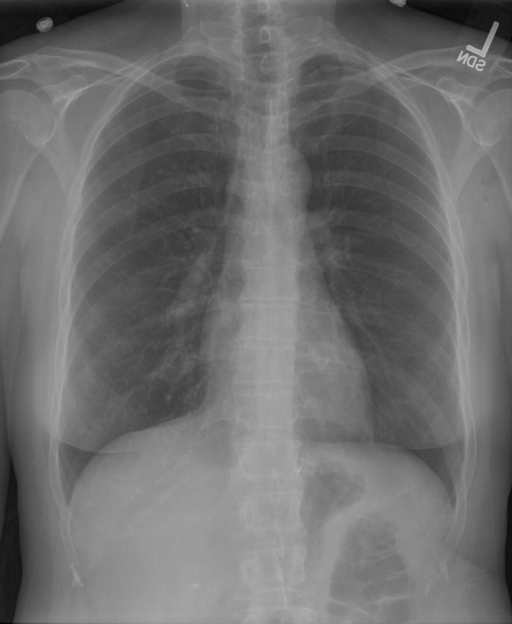

In [80]:
iuxray_vqa_example_plotter.inspect_example(['bleu_question', 'bleu-1', 'bleu-2', 'bleu-3', 'bleu-4', 'rougeL', 'ciderD',
                                            'medcomp', 'wmedcomp', 'medtagf1', 'orienacc', 'chxlabelacc'],
                                           metrics_to_rank=['medtagf1', 'chxlabelacc'],
                                           question='pneumothorax',
                                           mode='random')

Report:

There is no focal consolidation or pneumothorax. Right pleural effusion is similar to prior. There is a new moderate to large left pleural effusion. Cardiomegaly is similar to prior. Imaged osseous structures are intact. No free air below the right hemidiaphragm is seen

idx: 27548
--
question: free air
pred_question: free air
--
answer: no free air below the right hemidiaphragm is seen
pred_answer: there is a small amount of free air under the right hemidiaphragm
--
orientation: AP
pred orientation: AP
--
tags: ['intact', 'air', 'effusion', 'consolidation', 'structures', 'no', 'free', 'pneumothorax', 'moderate', 'below', 'focal', 'large', 'right', 'cardiomegaly', 'left', 'pleural', 'hemidiaphragm', 'osseous']
pred tags: ['edema', 'effusion', 'left', 'no', 'pleural', 'pneumothorax', 'pulmonary', 'right', 'small']
--
chexpert_labels: Cardiomegaly, Pleural Effusion
pred_chexpert_labels: Cardiomegaly, Lung Opacity, Edema, Atelectasis, Pleural Effusion, Support Devices
--
chexpert

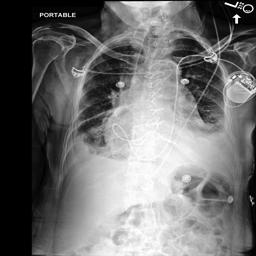

In [78]:
mimiccxr_vqa_example_plotter.inspect_example(['bleu_question', 'bleu-1', 'bleu-2', 'bleu-3', 'bleu-4', 'rougeL', 'ciderD',
                                            'medcomp', 'wmedcomp', 'medtagf1', 'orienacc', 'chxlabelacc'],
                                           metrics_to_rank=['medtagf1', 'chxlabelacc'],
                                           question='free air',
                                           mode='random')